In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('D:/NTI Artificial Intelligence/day 7/insurance_data.csv')

In [5]:
df.head(10)

,age,affordability,insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1
5,56,1,1
6,55,0,0
7,60,0,1
8,62,1,1
9,61,1,1


In [6]:
df.tail(10)

,age,affordability,insurance
490,39,1,0
491,46,0,0
492,27,1,1
493,33,0,0
494,33,0,0
495,26,0,0
496,58,0,0
497,40,0,0
498,49,1,1
499,33,0,0


In [7]:
df.sample(10)

,age,affordability,insurance
129,28,1,0
184,38,1,0
256,26,1,1
470,20,1,1
286,47,1,1
207,63,1,0
430,29,0,0
82,27,1,0
170,45,0,0
65,60,1,1


In [8]:
df.isna().sum()

age              0
affordability    0
insurance        0
dtype: int64

In [9]:
df.dtypes

age              int64
affordability    int64
insurance        int64
dtype: object

In [10]:
df['affordability'].unique()

array([1, 0], dtype=int64)

In [11]:
df=df.dropna()

In [12]:
df.dropna(inplace=True)

In [13]:
df.describe()

,age,affordability,insurance
count,500.000000,500.000000,500.000000
mean,40.644000,0.508000,0.528000
std,13.848351,0.500437,0.499715
min,18.000000,0.000000,0.000000
25%,29.000000,0.000000,0.000000
50%,40.000000,1.000000,1.000000
75%,52.000000,1.000000,1.000000
max,65.000000,1.000000,1.000000


In [14]:
df.corr()

,age,affordability,insurance
age,1.000000,-0.028794,0.070365
affordability,-0.028794,1.000000,-0.008911
insurance,0.070365,-0.008911,1.000000


In [15]:
import seaborn as sn

In [16]:
df.groupby(['insurance']).mean()

,age,affordability
insurance,,
0,39.614407,0.512712
1,41.564394,0.503788


([<matplotlib.patches.Wedge at 0x1bd7c602500>,
 [Text(0.04149530558381211, 1.099217057552559, '0'),
  Text(-0.04149551141606798, -1.099217049782398, '1')])

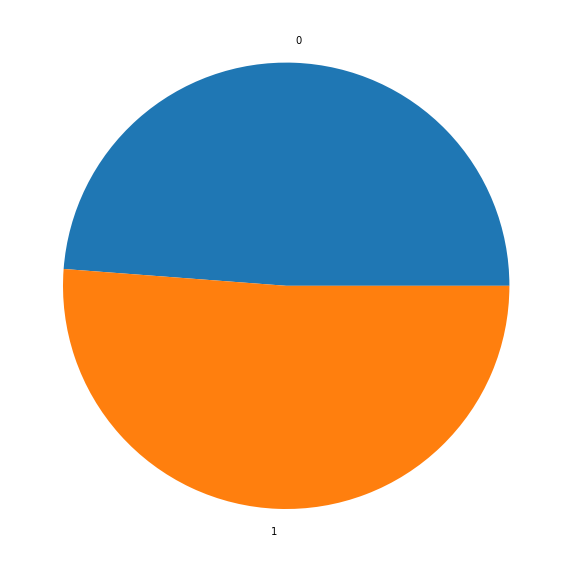

In [17]:
plt.figure(figsize=(10,20))
plt.pie(df.groupby(['insurance']).mean()['age'],labels=['0','1'])

In [18]:
input_data= df[['age','affordability']]

target_data = df['insurance']

In [19]:
input_data= df.drop(['insurance'],axis=1)
target_data = df['insurance']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test =train_test_split(input_data,target_data,test_size=.2,random_state=42)

In [22]:
input_data

,age,affordability
0,22,1
1,25,0
2,47,1
3,52,0
4,46,1
...,...,...
495,26,0
496,58,0
497,40,0
498,49,1


In [23]:
target_data 


0      0
1      0
2      1
3      0
4      1
      ..
495    0
496    0
497    0
498    1
499    0
Name: insurance, Length: 500, dtype: int64

In [24]:
X_train

,age,affordability
249,32,1
433,43,0
19,18,1
322,64,0
332,23,1
...,...,...
106,45,0
270,20,1
348,49,1
435,38,1


In [25]:
type(X_train)

pandas.core.frame.DataFrame

In [26]:
y_train

249    0
433    1
19     0
322    1
332    1
      ..
106    0
270    0
348    0
435    1
102    1
Name: insurance, Length: 400, dtype: int64

In [27]:
type(y_train)

pandas.core.series.Series

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
lreg_model=LogisticRegression()

In [54]:
lreg_model.fit(X_train,y_train)

LogisticRegression()

In [43]:
pred=lreg_model.predict(X_test)

In [46]:
np.shape(pred)


(100,)

In [47]:
y_test

361    1
73     1
374    0
155    1
104    1
      ..
347    1
86     1
75     1
438    1
15     1
Name: insurance, Length: 100, dtype: int64

In [48]:
pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [55]:
lreg_model.score(X_test,y_test)

0.58

In [50]:
lreg_model.coef_

array([[ 0.00705768, -0.07008645]])

In [53]:
lreg_model.intercept_

array([-0.19333291])